# CS205 - Final Project
### <u>Fall 2022 Contributors</u>

Afraaz Mohammed - (amoha120@ucr.edu)

Daniel Murphy   - (dmurp006@ucr.edu)

Shaheriar Malik - (smali032@ucr.edu)

# Breast Cancer Diagnosis Classifier

### The Question
This report outlines the findings of the Breast Cancer Diagnosis Classifier data analysis given a set of unique features. Said features will help determine whether the breast cancer is benign or malignant and we will analyze potential factors that may make one prone to having breast cancer.

So, the primary objectives are to answer the following questions:

1) **What factors determine the diagnosis of breast cancer?**

2) **Can Machine Learning be used to diagnose breast cancer?**

### The Data

The dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)) through UCI's Machine Learning Repository.

There are two attributes within the dataset:
- [Patient] ID Number
- Diagnosis (M = malignant, B = benign)

and a total of ten features as follows (Each feature includes the mean, standard error and worst case data):
- Radius (mean of distances from center to points on the perimeter) 
- Texture (standard deviation of gray-scale values) 
- Perimeter 
- Area 
- Smoothness (local variation in radius lengths) 
- Compactness (perimeter^2 / area - 1.0) 
- Concavity (severity of concave portions of the contour) 
- Concave points (number of concave portions of the contour) 
- Symmetry 
- Fractal dimension ("coastline approximation" - 1)

### The Approach
Once the data was cleaned, we analyze it to find the most useful features for classification. Once this has been performed, the resultant features will be passed into RandomForestClassifier. The model uses the selected numerical columns to ensure the highest accuracy possible with the given data set.

### Our hypothesis
Without any formal medical knowledge or exposure, we claim that without most of the given features the model can still perform well as most of them are correlated.

### Why Bother?
Having no medical knowledge, teaching a machine to diagnose the chances of breast cancer seems fascinating. Identifying which features matter more for this problem is very useful. If the evaluated metrics are above the rate of human error, this can be used for actual diagnosis.

#Basic Setup

We load the necessary libraries that will provide us with various machine learning tools. 

Pandas and Numpy are useful for data manipulation.

Matplotlib and Seaborn are used to provide visualizations.

Scikit-learn (sklearn) provides various machine learning algorithms.

In [ ]:
# random -- int generator
import random

# numpy -- array computation
import numpy as np

# pandas -- File Input
import pandas as pd # Reads csv file (dataset) 

# matplotlib -- Visualization
import matplotlib.pyplot as plt # Used to plot figures
import seaborn as sns # Used to plot figures

# sklearn -- Algorithms
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from sklearn.neighbors import KNeighborsClassifier   # KNN Classification
from sklearn.model_selection import train_test_split # Train/Test data splitter
from sklearn.svm import SVC                          # Support Vector Machine for classification
from sklearn.preprocessing import StandardScaler     # For normalization
#Various metrics to measure results
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, roc_curve, RocCurveDisplay, auc, plot_roc_curve

# Misc
import warnings                   # Import warnings library
warnings.filterwarnings('ignore') # to suppress notifications within the notebook

#The Data

In [ ]:
# Mount the Google Drive to link the shared drive with colab
from google.colab import drive                                              # Imports Google Drive into Google Colab
drive.mount('/content/drive')                                               # Mounts the specified directory
raw_df = pd.read_csv('/content/drive/MyDrive/CS205 Final Project/data.csv') # Read in the dataset using pandas library
raw_df.head()                                                               # View the first 5 rows of the DataFrame

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Here are some immediate observations:
1. id cannot be used for classification
2. We can remove columns with NaN values. For ex: "Unnamed: 32"
3. The second column "diagnosis" is our dependent variable.

Let's plot the features so that we can identify the trends and figure out which features are important for classification 

#Data Analysis and Visualization

In [ ]:
# Dataset input, mutation & display
raw_df = raw_df.drop(['Unnamed: 32','id'],axis=1) # id is irrelevant to our use case and Unnamed: 32 contains NaN values
raw_df = raw_df.dropna(axis=1, how = 'all')       # drop all empty values from the dataset in local copy raw_df
clean_df = raw_df.copy()                          # create a copy to work on without making changes to the initial variable

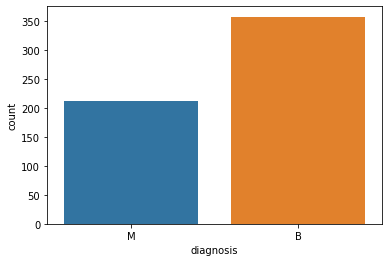

In [ ]:
y = clean_df["diagnosis"]           # y holds diagnosis
X = clean_df.copy()                 # create a copy of the cleaned dataframe for X
X = X.drop("diagnosis",axis=1)      # storing dependent and independent variables in y and X respectively
ax = sns.countplot(y,label="Count") # plot to check distribution of class labels

We can see that we have more Benign data (1) than Malignant Data (0)

We need to check what kind of relationship the features have and what their distributions are so that we can perform feature selection. Too many features can lead to the curse of dimensionality we don't have enough data to accompany them

## Why Visualization?

Imagine you're at a restaurant. You'd look at the menu before deciding what you'd want to order. Similarly we visualize the data to see what features seem more useful for classification. We also try to identify features that look too similar so that we can avoid using both. Just like how we'd avoid ordering two dishes that probably taste similar.

We also standardize the data to make it easier to observe and plot it.



In [ ]:
# Standardizing the data
diagnosis = y                               # Feed data from y into diagnosis variable
data = X.copy()                             # Copy X data into data variable
data = (data - data.mean()) / (data.std())  # Z-Score Normalization

##Violin Plot

A violin plot is the hybrid of boxplot and a density plot. It shows the distribution of data along with class labels.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

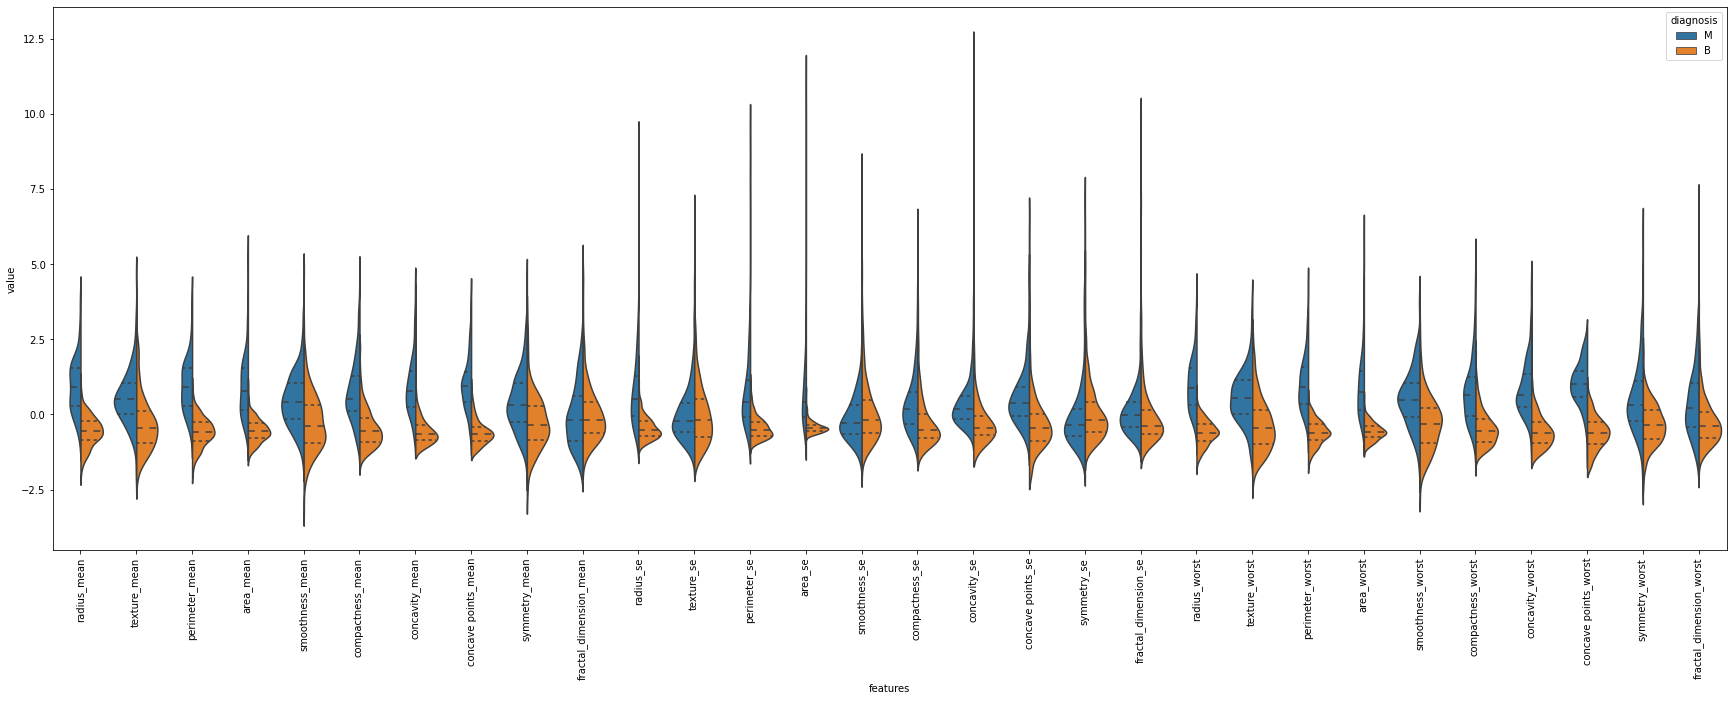

In [ ]:
data = pd.concat([y,data], axis = 1)                                                           # Combine data onto one axis
data = pd.melt(data,id_vars="diagnosis",var_name="features",value_name='value')                # Wide to long plot formatting
plt.figure(figsize=(30,10))                                                                    # Specify figure size
sns.violinplot(x="features",y="value", hue="diagnosis", data= data, split=True, inner="quart") # Plot violin visual
plt.xticks(rotation=90)                                                                        # Rotate the figure 90 degrees

The median for fractal_dimension_mean is similar for both the classes, so it may not be a good feature for classification

perimeter_mean and texture_mean seem like good features for classification

compactness_se, concavity_se look very similar. They might be correlated. We want diverse features so we should check further.

texture_se doesn't look like a good feature to separate the classes.

radius_worst, perimeter_worst and area_worst look very similar. They might be correlated. We want diverse features so we should check further.

##Swarm Plot

Swarm plots help show the distribution of attributes with respect to their classes.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

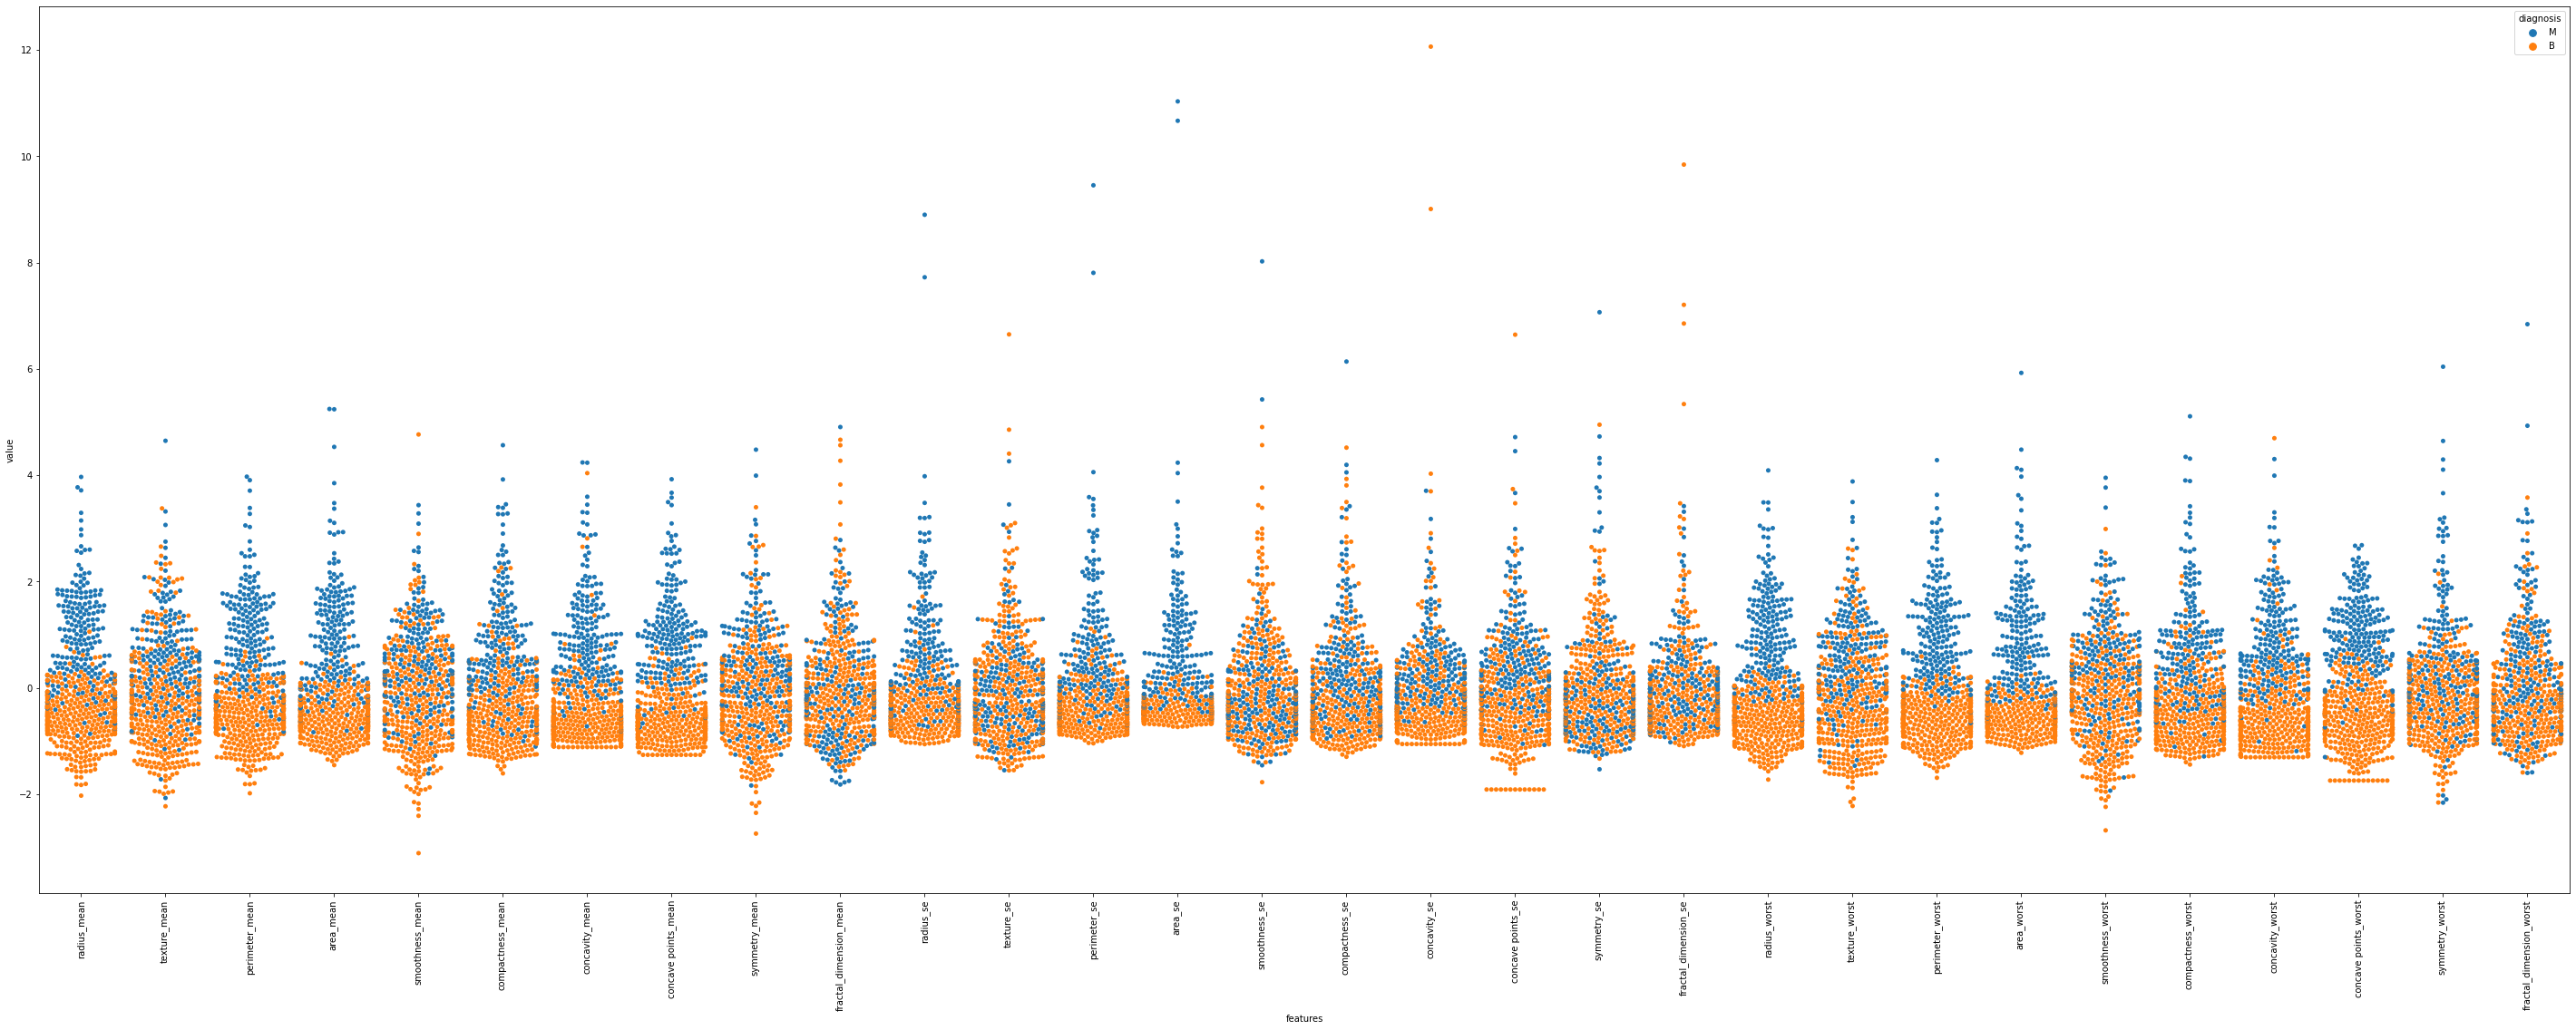

In [ ]:
plt.figure(figsize=(50,18))                                     # Specify figure size
sns.swarmplot(x="features",y="value",hue="diagnosis",data=data) # Plot the swarm plot with specified values
plt.xticks(rotation=90)                                         # Rotate the figure 90 degrees

smoothness_mean and fractal_dimensions_mean cannot be separated well

##Heatmap

Correlation between all features can be shown by a heatmap

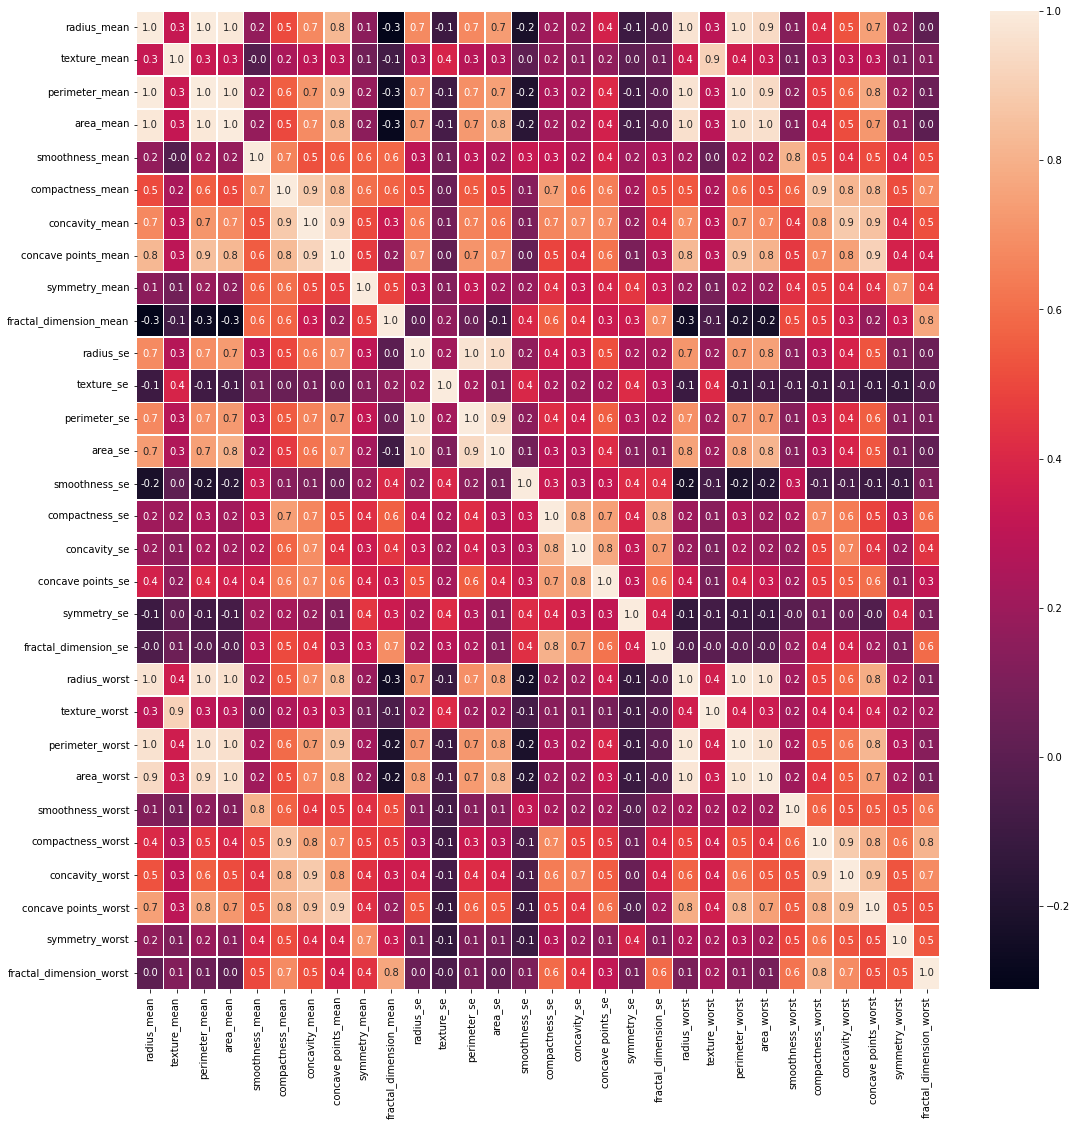

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))                            # Specify figure plot size
sns.heatmap(X.corr(), fmt= '.1f',linewidths=.5,annot=True,ax=ax) # Plot heatmap

We can see that our assumptions about radius_worst, perimeter_worst and area_worst being correlated are true. We can look at other correlations as well and drop the features we think are highly correlated. We can also drop features whose swarm plots look like they cannot classify labels well.

Here are the final observations

These features are highly correlated and including one from each is enough:

1. radius_mean, perimeter_mean, area_mean, radius_worst, perimeter_worst, area_worst, radius_se, perimeter_se, area_se

2. smoothness_mean and smoothness_worst

3. texture_mean and texture_worst

4. compactness_mean, concavity_mean, concave_points_mean, compactness_worst, concavity_worst and concave_points_worst

5. fractal_dimension_mean and fractal_dimension_worst

6. compactness_se, concacity_se, fractal_dimension_se and concave_points_se

These features separate the classes well:
- radius_mean
- concavity_mean
- texture_mean

In [ ]:
best_features = ['radius_mean','concavity_mean','texture_mean'] # store the best features into a container

#Setup Classifier

We train the model to classify possibility of breast cancer, on part of the given data. After training, we test the model on unseen data to evaluate it's performance.

We have 569 rows so a 80:20 split seems viable for training and testing. We iterate through various cobinations of training and testing data and take the mean of the varies results.

The X and Y below stand for two things: X = data, Y = labels (Benign or Malignant). The model tries to learn a function Y = F(X) where Y is the dependent variable and X consists of one or more independent variables.

We train the model on all the columns and on the columns we feel matter more and compare the results.

In [ ]:
# Convert categorical labels to numerical because the model doesn't understand text
clean_df.loc[clean_df['diagnosis'] == 'M','diagnosis'] = 1   # changes 'M' values to numerical one
clean_df.loc[clean_df['diagnosis'] == 'B','diagnosis'] = 0   # changes 'B' values to numerical zero
clean_df['diagnosis'] = pd.to_numeric(clean_df['diagnosis']) # forces numerical values
clean_df                                                     # display the cleaned dataframe

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Initialize containers
accuracy_values = []  # Holds accuracy values
precision_values = [] # Holds precision values
recall_values = []    # Holds recall values
f1_values = []        # Holds F1 score values
auc_values = []       # Holds auc values

In [ ]:
# Random Forest Classifier
model = RandomForestClassifier() # store the Random Forest Classifier into a model variable
y = clean_df["diagnosis"]             # holds diagnosis column => y
X = clean_df.drop("diagnosis",axis=1) # drops diagnosis column => X
Xnew = X.filter(best_features,axis=1) # X now holds only the best features for the classifier

# Loop through the dataset
for i in range(100):                                                          # For 100 iterations
  # Prime the model
  x_train, x_test, y_train, y_test = train_test_split(Xnew,y,test_size = 0.3) # split our dataset into train and test
  model.fit(x_train,y_train)                                                  # fit our model
  y_pred = model.predict(x_test)                                              # test on unseen data   
  accuracy_values.append(model.score(x_test,y_test))                          # append to the list of accuracies

  # Calculate various metrics
  precision_values.append(precision_score(y_test, y_pred)) # Precision values
  recall_values.append(recall_score(y_test, y_pred))       # Recall values
  f1_values.append(f1_score(y_test, y_pred))               # F1 scores
  auc_values.append(roc_auc_score(y_test, y_pred))         # AUC (Area Under Curve) values

In [ ]:
# Mean Calculation
accuracy_mean = np.mean(accuracy_values)   # Accuracy mean
precision_mean = np.mean(precision_values) # Precision mean
recall_mean = np.mean(recall_values)       # Recall mean
f1_mean = np.mean(f1_values)               # F1 score mean
auc_mean = np.mean(auc_values)             # AUC (Area Under Curve) mean

# Standard Deviation
accuracy_std = np.std(accuracy_values)   # Accuracy std
precision_std = np.std(precision_values) # Precision std
recall_std = np.std(recall_values)       # Recall std
f1_std = np.std(f1_values)               # F1 score std
auc_std = np.std(auc_values)             # AUC (Area Under Curve) std

# Display Results
print("Accuracy:\t", f'{accuracy_mean:.3f}', " +/- ", f'{accuracy_std:.3f}')    # Accuracy mean & std with 3 sig figs
print("Precision:\t", f'{precision_mean:.3f}', " +/- ", f'{precision_std:.3f}') # Precision mean & std with 3 sig figs
print("Recall:\t\t", f'{recall_mean:.3f}', " +/- ", f'{recall_std:.3f}')        # Recall mean & std with 3 sig figs
print("F1 Score:\t", f'{f1_mean:.3f}', " +/- ", f'{f1_std:.3f}')                # F1 score mean & std with 3 sig figs
print("AUC:\t\t", f'{auc_mean:.3f}', " +/- ", f'{auc_std:.3f}')                 # AUC mean & std with 3 sig figs

Accuracy:	 0.926  +/-  0.017
Precision:	 0.912  +/-  0.034
Recall:		 0.886  +/-  0.040
F1 Score:	 0.898  +/-  0.024
AUC:		 0.918  +/-  0.020


Relevant instance - an instance that is actually malignant

Retrieved instance - an instance the model predicts as malignant

- Accuracy: Fraction of correct predictions
- Precision: Fraction of relevant instances among the retrieved instances 
- Recall: Fraction of relevant instances that were retrieved out of all relevant instances
- F1 Score: Harmonic mean of precision and recall
- AUC (Area under ROC): Tests whether positives are ranked higher than negatives.
AUC is often used to compare models during classification

In [ ]:
# Initializing lists to store the results
accuracy_values = []  # Accuracy value container
precision_values = [] # Precision value container
recall_values = []    # Recall value container
f1_values = []        # F1 value container
auc_values = []       # AUC value container

# Initialize SVM model
model = SVC()                         # store the SVC into a model variable => Support Vector Classifier
y = clean_df["diagnosis"]             # holds diagnosis column => y
X = clean_df.drop("diagnosis",axis=1) # drops diagnosis column => X
Xnew = X.filter(best_features,axis=1) # X now holds only the best features for the classifier

# Loop through the dataset
for i in range(100):                                                          # For 100 iterations
  # Prime the model
  x_train, x_test, y_train, y_test = train_test_split(Xnew,y,test_size = 0.3) # split our dataset into train and test
  model.fit(x_train,y_train)                                                  # fit our model
  y_pred = model.predict(x_test)                                              # test on unseen data   
  accuracy_values.append(model.score(x_test,y_test))                          # append to the list of accuracies

  # Calculate various metrics
  precision_values.append(precision_score(y_test, y_pred)) # Precision values
  recall_values.append(recall_score(y_test, y_pred))       # Recall values
  f1_values.append(f1_score(y_test, y_pred))               # F1 scores
  auc_values.append(roc_auc_score(y_test, y_pred))         # AUC (Area Under Curve) values

# Mean Calculation
accuracy_mean = np.mean(accuracy_values)   # Accuracy mean
precision_mean = np.mean(precision_values) # Precision mean
recall_mean = np.mean(recall_values)       # Recall mean
f1_mean = np.mean(f1_values)               # F1 score mean
auc_mean = np.mean(auc_values)             # AUC (Area Under Curve) mean

# Standard Deviation
accuracy_std = np.std(accuracy_values)   # Accuracy std
precision_std = np.std(precision_values) # Precision std
recall_std = np.std(recall_values)       # Recall std
f1_std = np.std(f1_values)               # F1 score std
auc_std = np.std(auc_values)             # AUC (Area Under Curve) std

# Display Results
print("Accuracy:\t", f'{accuracy_mean:.3f}', " +/- ", f'{accuracy_std:.3f}')    # Accuracy mean & std with 3 sig figs
print("Precision:\t", f'{precision_mean:.3f}', " +/- ", f'{precision_std:.3f}') # Precision mean & std with 3 sig figs
print("Recall:\t\t", f'{recall_mean:.3f}', " +/- ", f'{recall_std:.3f}')        # Recall mean & std with 3 sig figs
print("F1 Score:\t", f'{f1_mean:.3f}', " +/- ", f'{f1_std:.3f}')                # F1 score mean & std with 3 sig figs
print("AUC:\t\t", f'{auc_mean:.3f}', " +/- ", f'{auc_std:.3f}')                 # AUC mean & std with 3 sig figs

Accuracy:	 0.899  +/-  0.020
Precision:	 0.918  +/-  0.032
Recall:		 0.801  +/-  0.053
F1 Score:	 0.854  +/-  0.031
AUC:		 0.879  +/-  0.025


##AUROC

The plot given below is called a Receiver-Operator Curve (ROC). The AUC score (area under the curve) tells us how accurate the classifier is.

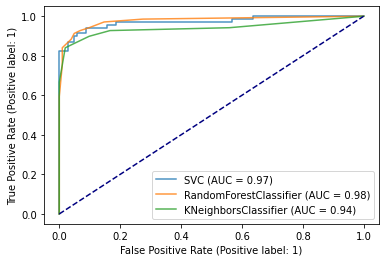

In [ ]:
# Initialize training and test sets
x_train, x_test, y_train, y_test = train_test_split(Xnew,y,test_size = 0.3)  # prime the train, test, split method call with a 70-30 split                   

# Priming the model
model = SVC()              # store the SVC into a model variable => Support Vector Classifier
model.fit(x_train,y_train) # fit the model using the training sets for x & y

# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=10) # store the Random Forest Classifier into a variable with 10 estimators specified
rfc.fit(x_train, y_train)                     # fit the model using the training sets for x & y

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=7) # store the KNN classifier into a variable with 7 neighbors specified
knn.fit(x_train,y_train)                  # fit the model using the training sets for x & y

# Visualization -- True & False Positive Rates
ax = plt.gca() # Prime the matplotlib plot for visualization
svc_disp = RocCurveDisplay.from_estimator(model, x_test, y_test, ax=ax, alpha=0.8) # ROC curve for SVC (Support Vector Classifier)
rfc_disp = RocCurveDisplay.from_estimator(rfc, x_test, y_test, ax=ax, alpha=0.8)   # ROC curve for RFC (Random Forest Classifier)
knn_disp = RocCurveDisplay.from_estimator(knn, x_test, y_test, ax=ax, alpha=0.8)   # ROC surve for KNN (K-Nearest Neighbors)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")                             # Specify the line's plot and style

The Random Forest model has an AUC score of 0.98. This accuracy is very high for a machine learning problem. We can see that it doesn't overfit the data as we evaluate on unseen test sets everytime.

## Conclusion

So, our questions may now be answered. 

**What factors determine the diagnosis of breast cancer?**

We can see that the model performs extremely well using just the 3 selected features: radius_mean, concavity_mean and texture_mean.

<u>Note</u>: This reduces the dimensionality of the problem from 33 to 3, making it easier to evaluate and compare.

It is clear that these three selected features yield a significantly accurate result in classifying breast cancer.

However, the larger question remains:

**Can Machine Learning be used to diagnose breast cancer?**

The data shows that according to Support Vector Classification, Random Forest Classification and K-Nearest Neighbors, the results were 98% accurate along with visual representations of each classification method respectively. In short, yes, Machine Learning can be used to diagnose breast cancer from what we can analyze in this specific dataset.

## Citation

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.